**IMPORTS**

In [1]:
!pip install -q xlrd
!git clone https://github.com/shreyas-bk/without_mask.git

Cloning into 'without_mask'...
remote: Enumerating objects: 674, done.
remote: Total 674 (delta 0), reused 0 (delta 0), pack-reused 674
Receiving objects: 100% (674/674), 24.23 MiB | 42.49 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import argparse
import os

**SETUP**

*ENTER YOUR NAME*

In [3]:
name = 'Shreyas'

*Requirement: 1 PICTURE WITH A FACEMASK AND 1 WITHOUT A FACEMASK*




*Method 1 : Upload pictures from local storage.*

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Shreyas_without_mask (1).jpg to Shreyas_without_mask (1).jpg
Saving Shreyas_with_mask (1).jpg to Shreyas_with_mask (1).jpg


*Method 2: Take pictures by running the next 2 cells*

*WITHOUT MASK*

<IPython.core.display.Javascript object>

Saved to Shreyas_without_mask.jpg


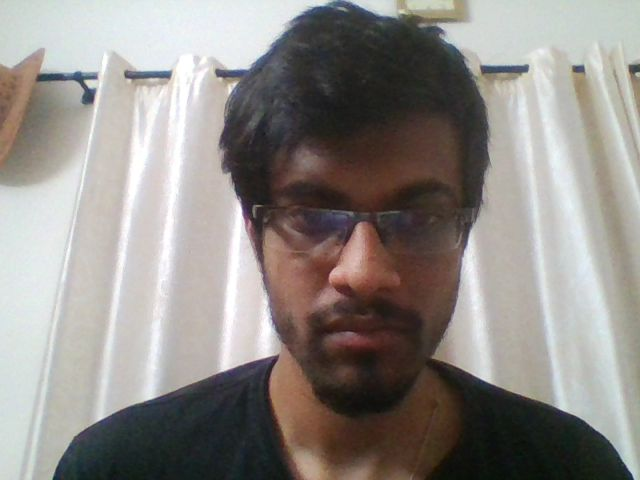

In [ ]:
#WITHOUT MASK
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename=name+'_without_mask.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Take picture without mask';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

*WITH MASK*

<IPython.core.display.Javascript object>

Saved to Shreyas_with_mask.jpg


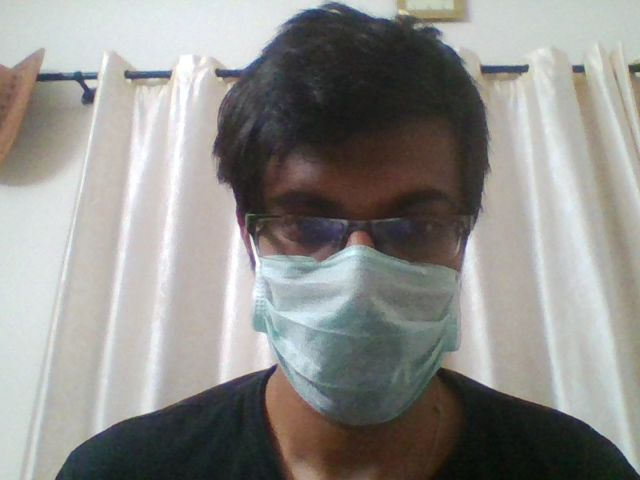

In [ ]:
#WITH MASK
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename=name+'_with_mask.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Take picture with mask';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

**MASK DETECTION**

*Load data*

In [5]:
data = []
labels = []
count = 0
for imagePath in list(paths.list_images('/content/')):
  count+=1
  label = imagePath.split(os.path.sep)[-2]
  image = load_img(imagePath, target_size=(224, 224))
  image = img_to_array(image)
  image = preprocess_input(image)
  if imagePath=='/content/'+name+'_without_mask.jpg':
    datagen = ImageDataGenerator(zoom_range=0.2,height_shift_range=40)
    i=0
    lis = []
    img = load_img(imagePath, target_size=(224, 224))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    for batch in datagen.flow(x, batch_size=1):
      image = img_to_array(batch[0])
      image = preprocess_input(image)
      count+=1
      label = 'without-mask'
      data.append(image)
      labels.append(label)
      i += 1
      if i >= 100:
        break
    #for i in range(0,100):
      #count+=1
      #label = 'without-mask'
      #data.append(image)
      #labels.append(label)
  if imagePath=='/content/'+name+'_with_mask.jpg':
    datagen = ImageDataGenerator(zoom_range=0.4,height_shift_range=40,brightness_range=[0.5,1.5])
    i=0
    lis = []
    img = load_img(imagePath, target_size=(224, 224))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    for batch in datagen.flow(x, batch_size=1):
      image = img_to_array(batch[0])
      image = preprocess_input(image)
      count+=1
      label = 'with-mask'
      data.append(image)
      labels.append(label)
      i += 1
      if i >= 500:
        break
    #for i in range(0,100):
      #count+=1
      #label = 'with-mask'
      #data.append(image)
      #labels.append(label)
  else:
    data.append(image)
    labels.append(label)
data = np.array(data, dtype="float32")
labels = np.array(labels)
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
print('Loading complete for ',count,' images')

Loading complete for  1288  images


*Train model*

In [22]:
aug = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(2, activation='softmax')
])
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')>1):
      print('\nLoss too high, try rerunning cell')
      self.model.stop_training = True
    if(logs.get('accuracy')>0.95 and logs.get('val_accuracy')>0.95):
      print("\nStopping training with accuracy of >95%")
      self.model.stop_training = True
BS = 32
EPOCHS = 10
callback = myCallback()
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,
  callbacks = [callback])
tf.keras.backend.clear_session()

Epoch 1/10
32/32 [==============================] - 10s 326ms/step - loss: 0.4515 - accuracy: 0.7723 - val_loss: 0.0760 - val_accuracy: 0.9806
Epoch 2/10
32/32 [==============================] - 10s 322ms/step - loss: 0.2295 - accuracy: 0.9188 - val_loss: 0.3657 - val_accuracy: 0.8488
Epoch 3/10
32/32 [==============================] - 10s 320ms/step - loss: 0.1525 - accuracy: 0.9478 - val_loss: 0.0809 - val_accuracy: 0.9884
Epoch 4/10
32/32 [==============================] - ETA: 0s - loss: 0.1507 - accuracy: 0.9549
Stopping training with accuracy of >95%
32/32 [==============================] - 10s 328ms/step - loss: 0.1507 - accuracy: 0.9549 - val_loss: 0.0430 - val_accuracy: 0.9922


**PERSONAL DETECTION**

*Load data*

In [7]:
person_data = []
person_labels = []
count = 0
for imagePath in list(paths.list_images('/content/')):
  count+=1
  label = 'not-self'
  image = load_img(imagePath, target_size=(224, 224))
  image = img_to_array(image)
  image = preprocess_input(image)
  if imagePath=='/content/'+name+'_without_mask.jpg':
    a='''datagen = ImageDataGenerator(zoom_range=0.2,height_shift_range=40,brightness_range=[0.5,1.5])
    i=0
    lis = []
    img = load_img(imagePath, target_size=(224, 224))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    for batch in datagen.flow(x, batch_size=1):
      image = img_to_array(batch[0])
      image = preprocess_input(image)
      count+=1
      label = 'self'
      person_data.append(image)
      person_labels.append(label)
      i += 1
      if i >= 200:
        break'''
    for i in range(0,300):
      count+=1
      label = 'self'
      person_data.append(image)
      person_labels.append(label)
  if imagePath=='/content/'+name+'_with_mask.jpg':
    a='''datagen = ImageDataGenerator(zoom_range=0.4,height_shift_range=40,brightness_range=[0.5,1.5])
    i=0
    lis = []
    img = load_img(imagePath, target_size=(224, 224))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    for batch in datagen.flow(x, batch_size=1):
      image = img_to_array(batch[0])
      image = preprocess_input(image)
      count+=1
      label = 'self'
      person_data.append(image)
      person_labels.append(label)
      i += 1
      if i >= 200:
        break'''
    for i in range(0,300):
      count+=1
      label = 'self'
      person_data.append(image)
      person_labels.append(label)
  else:
    person_data.append(image)
    person_labels.append(label)
person_data = np.array(person_data, dtype="float32")
person_labels = np.array(person_labels)
lb = LabelBinarizer()
person_labels = lb.fit_transform(person_labels)
person_labels = to_categorical(person_labels)
print('Loading complete for ',count,' images')

Loading complete for  1288  images


*Train model*

In [13]:
#person_model
aug = ImageDataGenerator(
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.5,
        horizontal_flip=True,
        fill_mode='nearest')
(trainX, testX, trainY, testY) = train_test_split(person_data, person_labels,
	test_size=0.20, stratify=person_labels, random_state=42)
import tensorflow as tf
person_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(2, activation='softmax')
])
from tensorflow.keras.optimizers import RMSprop

person_model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')>1):
      print('\nLoss too high, try rerunning cell')
      self.model.stop_training = True
    if(logs.get('accuracy')>0.97 and logs.get('val_accuracy')>0.97):
      print("\nStopping training with accuracy of >97%")
      self.model.stop_training = True
BS = 32
EPOCHS = 10
callback = myCallback()
H = person_model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,
  callbacks = [callback])
tf.keras.backend.clear_session()

Epoch 1/10
32/32 [==============================] - 10s 319ms/step - loss: 0.8222 - accuracy: 0.8495 - val_loss: 0.0301 - val_accuracy: 0.9884
Epoch 2/10
32/32 [==============================] - 10s 313ms/step - loss: 0.0962 - accuracy: 0.9629 - val_loss: 0.0210 - val_accuracy: 0.9884
Epoch 3/10
32/32 [==============================] - ETA: 0s - loss: 0.0689 - accuracy: 0.9766
Stopping training with accuracy of >97%
32/32 [==============================] - 10s 318ms/step - loss: 0.0689 - accuracy: 0.9766 - val_loss: 0.0222 - val_accuracy: 0.9884


*Check confidence of models*

In [102]:
image = load_img('/content/Shreyas_with_mask.jpg', target_size=(224, 224))
image = img_to_array(image)
image = preprocess_input(image)
to_predict = []
to_predict.append(image)
to_predict = np.array(to_predict, dtype="float32")
print('Picture with mask')
print('Factor 1 confidence : ',round(max(model.predict(to_predict)[0]),3))
print('Factor 2 confidence : ',round(max(person_model.predict(to_predict)[0]),4))
image = load_img('/content/Shreyas_without_mask.jpg', target_size=(224, 224))
image = img_to_array(image)
image = preprocess_input(image)
to_predict = []
to_predict.append(image)
to_predict = np.array(to_predict, dtype="float32")
print('\nPicture without mask')
print('Factor 1 confidence : ',round(max(model.predict(to_predict)[0]),3))
print('Factor 2 confidence : ',round(max(person_model.predict(to_predict)[0]),4))
print('\nFactor 1 confidence should be greater than 0.95 and Factor 2 confidence should be greater than 0.98')

Picture with mask
Factor 1 confidence :  0.998
Factor 2 confidence :  0.9999

Picture without mask
Factor 1 confidence :  0.979
Factor 2 confidence :  0.9997

Factor 1 confidence should be greater than 0.95 and Factor 2 confidence should be greater than 0.98


**TEST THE MODELS**

*Set minimum confidence - default is 95% for first factor and 99% for second factor*

In [89]:
CONFIDENCE = 0.95
CONFIDENCE2 = 0.99



Mask detected with  97.44 % confidence.

Details:
First factor - Passing.
Second factor - Passing.



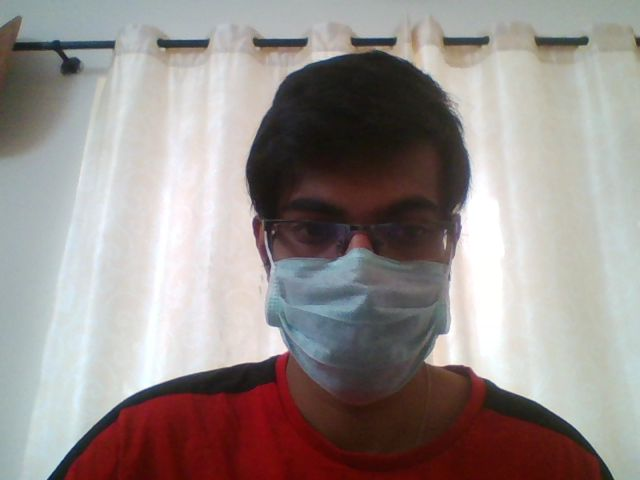

Access Granted


In [94]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);
      //setTimeout(() => {  console.log("World!"); }, 10000);
      //const promise = new Promise((resolve, reject) => {
      //setTimeout(() => {
       //resolve() // Change status to 'fulfilled'
      //}, 5000)
      //})
      //await promise
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename


from IPython.display import Image
from IPython.display import clear_output
import time
try:
  #filename = take_photo2()
  factor1,factor2='without mask','not self'
  print('\nWear your mask to access')
  start_flag=True
  while(factor1=='without mask' or factor2=='not self'):
    #time.sleep(0.1)
    if start_flag==False:
      clear_output()
      #print((model.predict(to_predict)[0]))
      #print((person_model.predict(to_predict)[0]))
      #if factor2=='self' and factor1=='without mask':
        #print('First factor - Failing.\nSecond factor - Passing.')
      #if factor2=='not self' and factor1=='with mask':
        #print('First factor - Passing.\nSecond factor - Failing.\nTry coming closer to the camera.')
      if prelim=='with mask' and factor1=='without mask':
        print('\nMask detected with low confidence (',round((confidence-0.5)*100,2),'%). Try coming closer to the camera and making sure the mask is covering your nose.')
      if factor1=='without mask' and prelim=='without mask':
        print('\nNo mask detected - Please wear a mask over your nose and mouth.')
      print('\nDetails:\nFirst factor - ','Passing' if factor1=='with mask' else 'Failing',('\nSecond factor - ','Passing\n' if factor2=='self' else 'Failing\n') if factor1=='with mask' else '\n')
    filename = take_photo()
    #print('Saved to {}'.format(filename))
  
    # Show the image which was just taken.
    #display(Image(filename))
    image = load_img('/content/photo.jpg', target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)
    to_predict = []
    to_predict.append(image)
    to_predict = np.array(to_predict, dtype="float32")
    factor1 = 'without mask' if model.predict(to_predict)[0][0]<CONFIDENCE else 'with mask'
    prelim = 'without mask' if model.predict(to_predict)[0][0]<0.5 else 'with mask'
    confidence = max(model.predict(to_predict)[0])
    factor2 = 'not self' if person_model.predict(to_predict)[0][1]<CONFIDENCE2 else 'self'
    #print((person_model.predict(to_predict)[0][0]),factor2)
    start_flag=False
    #print(confidence)
  clear_output()
  print('\n\nMask detected with ',round(confidence*100,2),'% confidence.\n\nDetails:\nFirst factor - Passing.\nSecond factor - Passing.\n')
  #print((model.predict(to_predict)[0]))
  #print((person_model.predict(to_predict)[0]))
  #print(max(person_model.predict(to_predict)[0]))
  #time.sleep(0.1)
  #filename = take_photo()
  display(Image(filename))
  print('Access Granted')
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [71]:
image = load_img('/content/appa_mask.jpg', target_size=(224, 224))
image = img_to_array(image)
image = preprocess_input(image)
to_predict = []
to_predict.append(image)
to_predict = np.array(to_predict, dtype="float32")
print(person_model.predict(to_predict)[0])
print(model.predict(to_predict)[0])

[0.00562984 0.99437016]
[0.60052294 0.39947706]


In [ ]:
#model.save('/content/mask')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/mask/assets


In [ ]:
#from tensorflow import keras
#model = keras.models.load_model('/content/mask')